In [24]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
from PIL import Image
import os
import pandas as pd
import pylab as pl

In [26]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

## Load data

In [27]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [28]:
X = pd.DataFrame([im.histogram() for im in images])

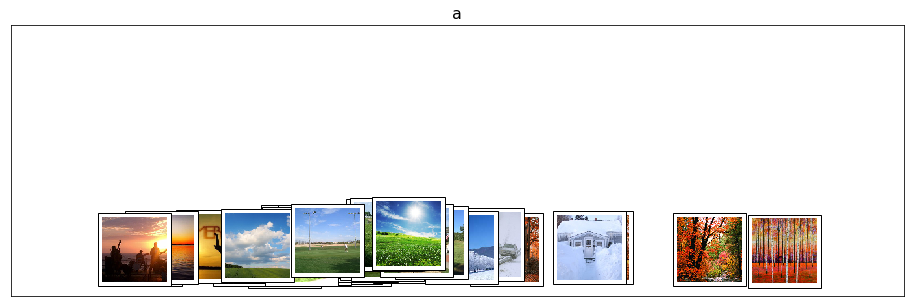

In [29]:
plot_image_space(images, X, 'a')

In [30]:
# Assignment 3 
# PART 1

import numpy as np
from sklearn import decomposition

In [33]:
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)

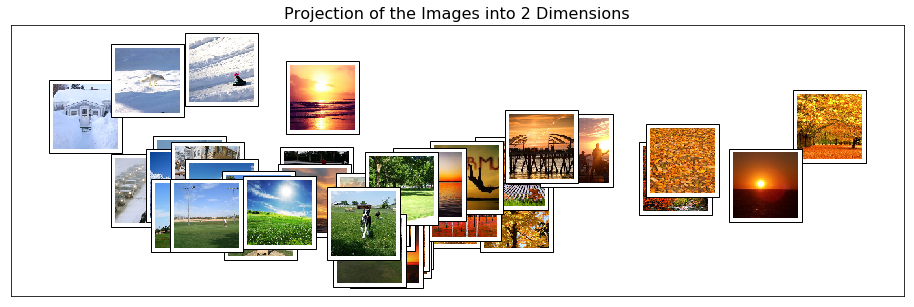

In [34]:
plot_image_space(images, X_pca, title="Projection of the Images into 2 Dimensions")

In [35]:
# Part 2

1 What does it mean for two images to be close together in this plot?  What does it meanfor two images to be far apart?

Answer: The images are projected to 2-Dimensions, reducing features to two. If two images close together in this plot means their retained two features are similiar; while if two images be far apart means their retained two features with highly difference. 

2 Do images corresponding to one of the seasons tend to group together more closely than others? Why might this be the case?

Answer: Yes, images corresponding to one season tend to group together more closely than others. Because each season has its own features, such as white appears more in winter and red appears more in autumn, and these kind of feature are more likely the important feature, retained after the projection process. Thus, the images in same season might have similar the retained feature, which means the closer they grouped in this plot. 

In [36]:
# Part 3
# I repeat this process using another method: TruncatedSVD

In [61]:
truncatedSVD = decomposition.TruncatedSVD(n_components=2)

In [62]:
X_truncatedSVD = truncatedSVD.fit_transform(X)

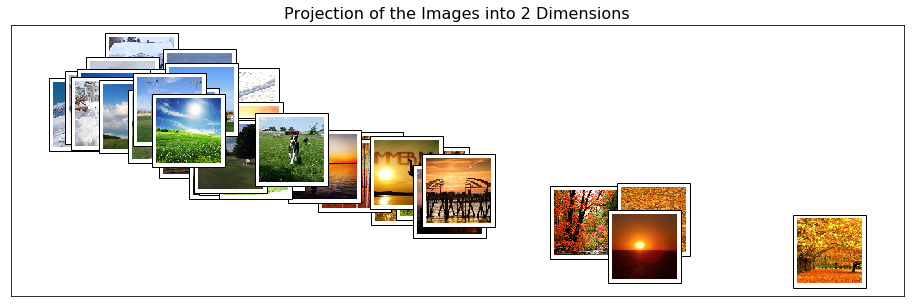

In [64]:
plot_image_space(images, X_truncatedSVD, title="Projection of the Images into 2 Dimensions")

Answer: Theorically, TruncatedSVD method performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with scipy.sparse matrices efficiently while PCA works better on dense matrices.
From the result, we see in TruncatedSVD method: it separates autumn images nicely but fails to separate spring, winter and summer. Thus, we conclude that PCA has a better performance on these images. 

> ### Grade: 95/100
- 1.0 25/25
- 2.1 15/15
- 2.2 10/10
- 3.0 45/50 (Did not comment on other student's result on slack)

> ** Good job! **

> Ps: Please notice that the due date is Monday midnight!